# Kshitij Ranjan

## The Sparks Foundation


### #GRIPJUNE22

### Task 1 : Prediction using Supervised ML

### Predict the percentage of a student based on no. of study hour

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load Dataset 

In [2]:
data_url ="http://bit.ly/w-data"
data = pd.read_csv(data_url)
print("Data Imported")
data

Data Imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
data.shape  #prints out the number of rows and column in the dataset

(25, 2)

### Visualize the dataset

In [4]:
data.info()  #prints out the information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
data.describe() #prints out the mean,std, max etc. values of the dataset

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


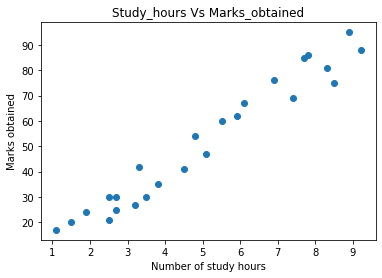

In [6]:
plt.scatter(x=data.Hours, y=data.Scores)
plt.xlabel("Number of study hours")
plt.ylabel("Marks obtained")
plt.title("Study_hours Vs Marks_obtained")
plt.show()

In [7]:
# From the graph we can visualize that the relation among the dataset is a linear regression

### Data Preprocessing

In [8]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [9]:
#There are no null values in the dataset

### Data Preparation

In [10]:
x_data = data.drop("Scores", axis=1)
x_data

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [11]:
y_data = data['Scores']
y_data

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

In [12]:
# Import train test model to fit the new x_data and y_data to train and test 

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state=0)

### Selecting an appropriate model to train the algorithm

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr = LinearRegression()
lr.fit(x_train, y_train)
print("Training complete")

Training complete


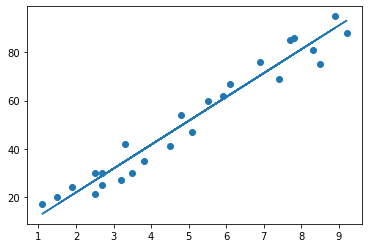

In [17]:
# Plotting the regression line
line = lr.coef_*x_data+lr.intercept_

# Plotting for the test data
plt.scatter(x_data, y_data)
plt.plot(x_data, line);
plt.show()

### Making Predictions

In [18]:
y_pred = lr.predict(x_test)

### Compare the actual and the predicted

In [19]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


### Predict on any input Hour

In [20]:
lr.predict([[9.25]])[0].round(2)

93.69

### Evaluate the performance of model

In [21]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982
